In [1]:
# env: Python 3

## import libraries
import pandas as pd
import numpy as np
import sys
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\Yunjia\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
## read in data
mydata = pd.read_csv('data/StudentData2.csv')

In [3]:
## convert 'id' to string
mydata['id'] = mydata['id'].apply(str)

## remove rows if length of 'id' is not equals to 6
mydata = mydata[mydata['id'].map(len) == 6]

In [4]:
## remove rows if gender is not 0 or 1
mydata = mydata[(mydata.gender == 1) | (mydata.gender == 2)]

In [5]:
## remove rows that age is not between 18 and 80
mydata = mydata[(mydata.age >= 18) & (mydata.age <= 80)]

In [6]:
## remove rows with gpa not between [0, 4], and missing
mydata = mydata[(mydata.gpa >= 0) & (mydata.gpa <= 4.0)]
mydata = mydata[pd.notnull(mydata['gpa'])]

In [7]:
## remove rows w/ SAT score out of range [0, 1600], and missing value
mydata = mydata[(mydata.sat >= 0) & (mydata.sat <= 1600)]
mydata = mydata[pd.notnull(mydata['sat'])]

In [8]:
## remove rows w/ null in 'section'
mydata = mydata[pd.notnull(mydata['section'])]

In [9]:
## remove incorrect value of final and project
mydata = mydata[(mydata.final >= 0) & (mydata.final <= 100)]
mydata = mydata[pd.notnull(mydata['final'])]
mydata = mydata[(mydata.project >= 0) & (mydata.project <= 100)]
mydata = mydata[pd.notnull(mydata['project'])]

In [10]:
## print dataframe
print(mydata)

        id  gender  age   gpa     sat  section  final  project
0   618027       2   27  2.59   700.0      3.0     75       69
1   691694       2   33  3.49   950.0      4.0     89       81
2   661363       2   31  3.78  1172.0      5.0     75       86
4   624861       2   27  3.47  1099.0      3.0     89       94
5   673174       2   32  3.36  1115.0      5.0     87       89
6   681530       2   26  3.14  1039.0      3.0     94       97
7   631316       2   27  2.80   720.0      3.0     81       91
9   664779       2   25  3.49  1195.0      5.0     89       80
11  642612       2   24  3.72  1308.0      5.0     87       79
12  654740       2   30  3.08   850.0      4.0     96       97
13  614150       2   26  3.90  1440.0      4.0     97       90
14  610145       2   30  3.33  1195.0      5.0     89       92
15  611050       2   26  1.78   500.0      1.0     53       56
17  667689       1   26  3.36  1111.0      3.0     60       67
18  658905       1   25  3.47  1152.0      4.0     71  

In [11]:
## save to csv
mydata.to_csv('output/OUTFILE.txt', sep = '\t')

In [12]:
# determine if final score w/ different gender
male_final = mydata[mydata['gender'] == 1]
female_final = mydata[mydata['gender'] == 2]

t_result = ttest_ind(male_final['final'], female_final['final'])

In [13]:
t_result

Ttest_indResult(statistic=-1.6364880163095339, pvalue=0.1159644309641248)

In [14]:
# print to file
with open("output/OUTFILE.txt", "a") as myfile:
    myfile.write('\n\n' + str(t_result))
    myfile.write('\nExplanation: The p-value shows that there is a 11.59% of probability that the results from ')
    myfile.write('this experiment happened by chance. Since it is greater than 5%, this p-value is not accepted ')
    myfile.write('to mean the data is valid.')

In [15]:
## determine the corrolation between final and project
corr = mydata['final'].corr(mydata['project'])
print('The corrolation between final and project is: ', corr)

The corrolation between final and project is:  0.898631551354


In [16]:
## print to file
with open("output/OUTFILE.txt", "a") as myfile:
    myfile.write('\n\nThe corrolation between final and project is: ' + str(corr))
    myfile.write(', which means that final and project is highly corrolated since it is close to 1.')

C:\Users\Yunjia\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


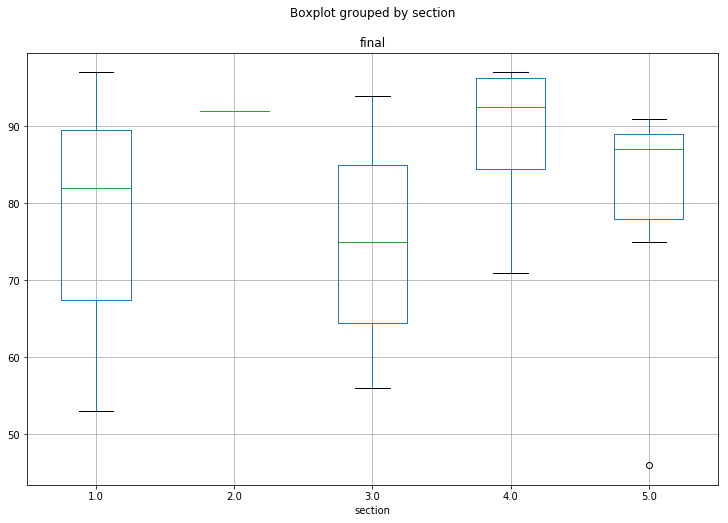

In [17]:
## determine if there's a significant difference between the 5 sections using ANOVA
#Create a boxplot
anova_df = mydata[['section', 'final']]

anova_df.boxplot('final', by='section', figsize=(12, 8))
plt.savefig('output/boxplot.png')

In [18]:
## replace section with group names
my_dict = {1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five'}

anova_df = anova_df.replace({'section': my_dict})

## prepare for ANOVA test
section1 = anova_df['final'][anova_df.section == 'one']
 
grps = pd.unique(anova_df.section.values)
d_data = {grp: anova_df['final'][anova_df.section == grp] for grp in grps}
 
k = len(pd.unique(anova_df.section))  # number of conditions
N = len(anova_df.values)  # conditions times participants
n = anova_df.groupby('section').size()[0] #Participants in each condition

In [19]:
mod = ols('final ~ section', data= anova_df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

               sum_sq    df         F    PR(>F)
section    626.462302   4.0  0.700962  0.600854
Residual  4245.162698  19.0       NaN       NaN


In [20]:
# print ANOVA result to file
with open("output/OUTFILE.txt", "a") as myfile:
    myfile.write('\n\n' + str(aov_table))
    myfile.write('\nThis tells us that there is no significant difference in the group means for final and section.')

In [21]:
## use numpy to get mean, median, max, min, variance, and std dev
## for final, project, gpa, and sat

# transform all data columns to np array
final = np.array(mydata['final'])
project = np.array(mydata['project'])
gpa = np.array(mydata['gpa'])
sat = np.array(mydata['sat'])

print("For final: ")
print("Mean: ", final.mean())
print("Standard deviation: ", final.std())
print("Minimum: ", final.min())
print("Maximum: ", final.max())
print("Median: ", np.median(final))
print("Variance: ", np.var(final))

For final: 
Mean:  80.375
Standard deviation:  14.2472585082
Minimum:  46
Maximum:  97
Median:  86.5
Variance:  202.984375


In [22]:
## print to file
with open("output/OUTFILE.txt", "a") as myfile:
    myfile.write("\n\nFor final: ")
    myfile.write("\nMean: " + str(final.mean()))
    myfile.write("\nStandard deviation: " + str(final.std()))
    myfile.write("\nMinimum: " + str(final.min()))
    myfile.write("\nMaximum: " + str(final.max()))
    myfile.write("\nMedian: " + str(np.median(final)))
    myfile.write("\nVariance: " + str(np.var(final)))

In [23]:
print("For project: ")
print("Mean: ", project.mean())
print("Standard deviation: ", project.std())
print("Minimum: ", project.min())
print("Maximum: ", project.max())
print("Median: ", np.median(project))
print("Variance: ", np.var(project))

For project: 
Mean:  82.0
Standard deviation:  12.770408503
Minimum:  52
Maximum:  99
Median:  86.5
Variance:  163.083333333


In [24]:
## print to file
with open("output/OUTFILE.txt", "a") as myfile:
    myfile.write("\n\nFor project: ")
    myfile.write("\nMean: " + str(project.mean()))
    myfile.write("\nStandard deviation: " + str(project.std()))
    myfile.write("\nMinimum: " + str(project.min()))
    myfile.write("\nMaximum: " + str(project.max()))
    myfile.write("\nMedian: " + str(np.median(project)))
    myfile.write("\nVariance: " + str(np.var(project)))

In [25]:
print("For gpa: ")
print("Mean: ", gpa.mean())
print("Standard deviation: ", gpa.std())
print("Minimum: ", gpa.min())
print("Maximum: ", gpa.max())
print("Median: ", np.median(gpa))
print("Variance: ", np.var(gpa))

For gpa: 
Mean:  3.28166666667
Standard deviation:  0.42847273996
Minimum:  1.78
Maximum:  3.9
Median:  3.37
Variance:  0.183588888889


In [26]:
## print to file
with open("output/OUTFILE.txt", "a") as myfile:
    myfile.write("\n\nFor gpa: ")
    myfile.write("\nMean: " + str(gpa.mean()))
    myfile.write("\nStandard deviation: " + str(gpa.std()))
    myfile.write("\nMinimum: " + str(gpa.min()))
    myfile.write("\nMaximum: " + str(gpa.max()))
    myfile.write("\nMedian: " + str(np.median(gpa)))
    myfile.write("\nVariance: " + str(np.var(gpa)))

In [27]:
print("For sat: ")
print("Mean: ", sat.mean())
print("Standard deviation: ", sat.std())
print("Minimum: ", sat.min())
print("Maximum: ", sat.max())
print("Median: ", np.median(sat))
print("Variance: ", np.var(sat))

For sat: 
Mean:  1050.16666667
Standard deviation:  307.981014927
Minimum:  3.0
Maximum:  1440.0
Median:  1113.0
Variance:  94852.3055556


In [28]:
## print to file
with open("output/OUTFILE.txt", "a") as myfile:
    myfile.write("\n\nFor sat: ")
    myfile.write("\nMean: " + str(sat.mean()))
    myfile.write("\nStandard deviation: " + str(sat.std()))
    myfile.write("\nMinimum: " + str(sat.min()))
    myfile.write("\nMaximum: " + str(sat.max()))
    myfile.write("\nMedian: " + str(np.median(sat)))
    myfile.write("\nVariance: " + str(np.var(sat)))

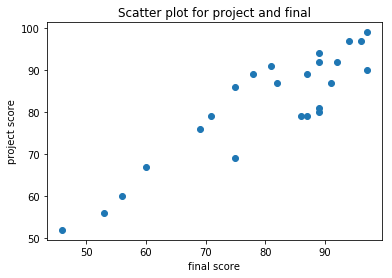

In [29]:
## create scatterplot to look at the relationship between final and project scores
plt.title('Scatter plot for project and final')
plt.scatter(mydata.final, mydata.project)
plt.xlabel('final score')
plt.ylabel('project score')
plt.savefig('output/scatterplot.png')

In [30]:
## bar graph shows the gpa values
# categorize gpa to A, B, C, D, F

mydata['grade'] = pd.cut(mydata.gpa, [0, 0.8, 1.6, 2.4, 3.2, 4], labels = ['F', 'D', 'C', 'B', 'A'])

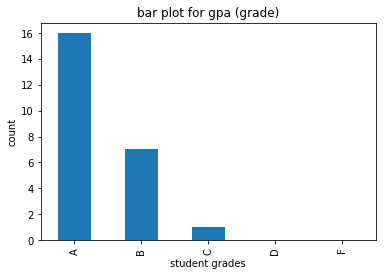

In [31]:
plt.title('bar plot for gpa (grade)')
pd.value_counts(mydata['grade']).plot.bar()
plt.xlabel('student grades')
plt.ylabel('count')
plt.savefig('output/barplot.png')